In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def poisson_errors(k, CL = 0.6827):
    
    # 1 Sig = 0.6827
    # 2 Sig = 0.9545
    # 3 Sig = 0.9973
    
    a = 1.0 - CL
    low, high = (stats.chi2.ppf(a/2, 2*k) / 2, stats.chi2.ppf(1-a/2, 2*k + 2) / 2)
    low = np.where(k==0,0,low)
    return k - low, high - k

def moving_average(x, w):
    ret = np.ones(len(x)/w)
    i = 0
    while i < len(ret):
        ret[i] = 0.5*(x[2*i] + x[2*i+1])
        i+=1
    return ret

def moving_sum(x, w):
    ret = np.ones(len(x)/w)
    i = 0
    while i < len(ret):
        ret[i] = x[2*i] + x[2*i+1]
        i+=1
    return ret

In [2]:
#Nominal binning
DLe = [250,350,450,550,650,750,850,950,1050,1150]
DLpred = np.array([1.78761,3.651559,3.319841,3.088899,3.3474206,2.9693623,3.011928,2.787382,2.677123,2.403942])
DLobs = np.array([4, 1, 1, 2, 5, 3, 8, 0, 1, 0])
DLrat = DLobs/DLpred
DLobserr = poisson_errors(DLobs)
DLerrlow,DLerrhigh = DLobserr[0]/DLpred,DLobserr[1]/DLpred

#double binning
DLe2 = moving_average(DLe,2)
DLpred2 = moving_sum(DLpred,2)
DLobs2 = moving_sum(DLobs,2)
DLrat2 = DLobs2/DLpred2
DLobserr2 = poisson_errors(DLobs2)
DLerrlow2,DLerrhigh2 = DLobserr2[0]/DLpred2,DLobserr2[1]/DLpred2

#box binning
DLeB = [350,600,950]
print(DLobs[0:2])
DLpredB = np.array([sum(DLpred[0:3]),sum(DLpred[3:5]),sum(DLpred[5:])])
DLobsB = np.array([sum(DLobs[0:3]),sum(DLobs[3:5]),sum(DLobs[5:])])
DLratB = DLobsB/DLpredB
DLobserrB = poisson_errors(DLobsB)
DLerrlowB,DLerrhighB = DLobserrB[0]/DLpredB,DLobserrB[1]/DLpredB

WCe=np.array([233.,369.,511.,649.,788.,927.,1065.,1206.,1345.,1484.,1621.,1762.,1901.,2040.,2180.,2319.,2457.])
WCrat=np.array([2.021,0.435,0.942,0.755,0.821,1.037,0.929,0.544,0.576,0.979,0.689,0.836,0.954,0.989,0.886,1.764,0.947])
WCerr=np.array([1.166,0.257,0.278,0.189,0.2,0.224,0.218,0.18,0.185,0.259,0.246,0.3,0.345,0.378,0.39,0.626,0.474])

PLe=np.array([225.,361.,501.,640.,780.,921.,1059.,1199.,1340.,1480.])
PLrat=np.array([2.40,0.636,0.945,0.594,0.423,1.174,0.525,0.664,0.621,0.947])
PLerr=np.array([1.67, 0.373,0.333,0.245,0.212,0.374,0.279,0.331,0.364,0.476])

[4 1]


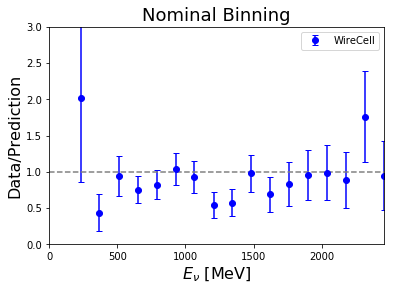

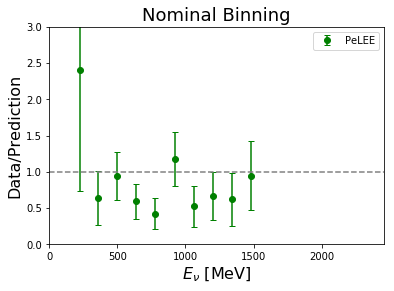

In [5]:
#Nominal Binning

plt.errorbar(DLe,DLrat,yerr=(DLerrlow,DLerrhigh),marker='o',linestyle='None',ecolor='red',
             markerfacecolor='red',markeredgecolor='red',capsize=3,label='DL')
plt.errorbar(WCe,WCrat,yerr=WCerr,marker='o',linestyle='None',ecolor='blue',
             markerfacecolor='blue',markeredgecolor='blue',capsize=3,label='WireCell')
plt.plot([0,WCe[-1]],[1.0,1.0],linestyle='--',color='grey')
plt.ylim(0,3)
plt.xlim([0,WCe[-1]])
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=16)
plt.ylabel('Data/Prediction',fontsize=16)
plt.legend()
plt.title('Nominal Binning',fontsize=18)
plt.show()

plt.errorbar(DLe,DLrat,yerr=(DLerrlow,DLerrhigh),marker='o',linestyle='None',ecolor='red',
             markerfacecolor='red',markeredgecolor='red',capsize=3,label='DL')
plt.errorbar(PLe,PLrat,yerr=PLerr,marker='o',linestyle='None',ecolor='green',
             markerfacecolor='green',markeredgecolor='green',capsize=3,label='PeLEE')
plt.plot([0,WCe[-1]],[1.0,1.0],linestyle='--',color='grey')
plt.ylim(0,3)
plt.xlim([0,WCe[-1]])
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=16)
plt.ylabel('Data/Prediction',fontsize=16)
plt.legend()
plt.title('Nominal Binning',fontsize=18)
plt.show()

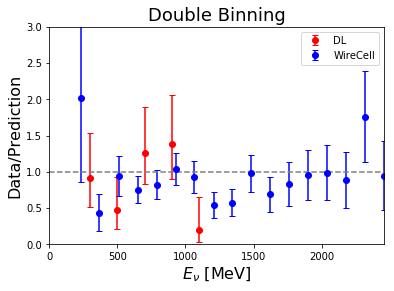

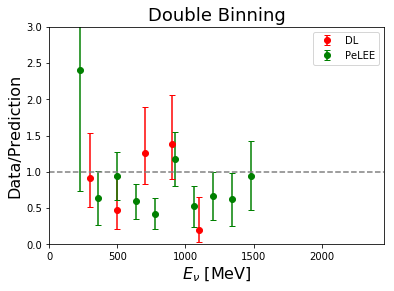

In [60]:
#Double Binning



plt.errorbar(DLe2,DLrat2,yerr=(DLerrlow2,DLerrhigh2),marker='o',linestyle='None',ecolor='red',
             markerfacecolor='red',markeredgecolor='red',capsize=3,label='DL')
plt.errorbar(WCe,WCrat,yerr=WCerr,marker='o',linestyle='None',ecolor='blue',
             markerfacecolor='blue',markeredgecolor='blue',capsize=3,label='WireCell')
plt.plot([0,WCe[-1]],[1.0,1.0],linestyle='--',color='grey')
plt.ylim(0,3)
plt.xlim([0,WCe[-1]])
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=16)
plt.ylabel('Data/Prediction',fontsize=16)
plt.legend()
plt.title('Double Binning',fontsize=18)
plt.show()

plt.errorbar(DLe2,DLrat2,yerr=(DLerrlow2,DLerrhigh2),marker='o',linestyle='None',ecolor='red',
             markerfacecolor='red',markeredgecolor='red',capsize=3,label='DL')
plt.errorbar(PLe,PLrat,yerr=PLerr,marker='o',linestyle='None',ecolor='green',
             markerfacecolor='green',markeredgecolor='green',capsize=3,label='PeLEE')
plt.plot([0,WCe[-1]],[1.0,1.0],linestyle='--',color='grey')
plt.ylim(0,3)
plt.xlim([0,WCe[-1]])
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=16)
plt.ylabel('Data/Prediction',fontsize=16)
plt.legend()
plt.title('Double Binning',fontsize=18)
plt.show()

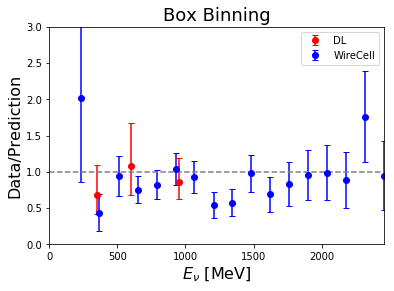

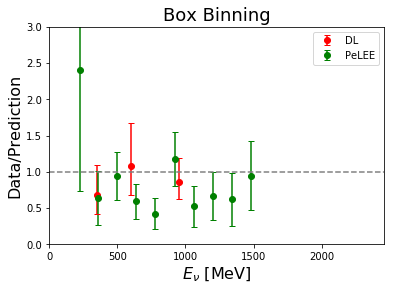

In [61]:
#Box Binning



plt.errorbar(DLeB,DLratB,yerr=(DLerrlowB,DLerrhighB),marker='o',linestyle='None',ecolor='red',
             markerfacecolor='red',markeredgecolor='red',capsize=3,label='DL')
plt.errorbar(WCe,WCrat,yerr=WCerr,marker='o',linestyle='None',ecolor='blue',
             markerfacecolor='blue',markeredgecolor='blue',capsize=3,label='WireCell')
plt.plot([0,WCe[-1]],[1.0,1.0],linestyle='--',color='grey')
plt.ylim(0,3)
plt.xlim([0,WCe[-1]])
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=16)
plt.ylabel('Data/Prediction',fontsize=16)
plt.legend()
plt.title('Box Binning',fontsize=18)
plt.show()

plt.errorbar(DLeB,DLratB,yerr=(DLerrlowB,DLerrhighB),marker='o',linestyle='None',ecolor='red',
             markerfacecolor='red',markeredgecolor='red',capsize=3,label='DL')
plt.errorbar(PLe,PLrat,yerr=PLerr,marker='o',linestyle='None',ecolor='green',
             markerfacecolor='green',markeredgecolor='green',capsize=3,label='PeLEE')
plt.plot([0,WCe[-1]],[1.0,1.0],linestyle='--',color='grey')
plt.ylim(0,3)
plt.xlim([0,WCe[-1]])
plt.xlabel(r'$E_\nu$ [MeV]',fontsize=16)
plt.ylabel('Data/Prediction',fontsize=16)
plt.legend()
plt.title('Box Binning',fontsize=18)
plt.show()